# 42 - Ejemplo: Segmentación de Clientes en Centros comerciales


* En este Notebook vamos a resolver un problema de ***Clusterización usando la librería de Scikit-Learn***, que consistirá en ***perfilar a los clientes*** que compran en un centro comercial.


* Para ello disponemos de la siguiente información de los clientes:

    1. ***Gender***: Male|Female
    2. ***Age***: Edad del cliente
    3. ***Annual_Income***: Ingresos anuales del cliente (por miles de dolares)
    4. ***Spending_Score***: Una valoración que va de 0 a 100 en función del número de compras y dinero que gasta el cliente.


* El objetivo de este ejemplo es el de ***agrupar (Clusterizar) a los clientes y sacar el perfíl de estos grupos***, para que posteriormente a clientes de ese perfíl se le puedan aplicar las acciones comerciales correspondientes.


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Selección del Número óptimo de Cluster](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Conclusiones: Interpretación de los resultados](#M6)


<hr>


* En primer lugar vamos a importar las librería necesarias:



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/Mall_Customers.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***CustomerID***
    - ***Gender***
    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***


In [2]:
df = pd.read_csv("./data/Mall_Customers.csv")
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
144,145,Male,25,77,12
154,155,Female,47,78,16
44,45,Female,49,39,28
145,146,Male,28,77,97
54,55,Female,50,43,45


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy
    
* Vamos a pasar los datos que nos interesan de los clientes a un array de numpy para que nos sirva como entrada al algoritmo de aprendizaje.


* Para este ejercicio nos vamos a quedar con las variables:

    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***


In [3]:
X = df[['Age', 'Annual_Income', 'Spending_Score']].values

<hr>


## <a name="M3">3. Visualización de los datos
    
* Vamos a pasar a ver la relación cada par de variables del Dataset incluido el genero, aunque no lo vayamos a usar en el ejemplo.


* Para poder visualizar el genero, tenemos que transformar las etiquetas a números asigando:
    - 0: Male
    - 1: Female


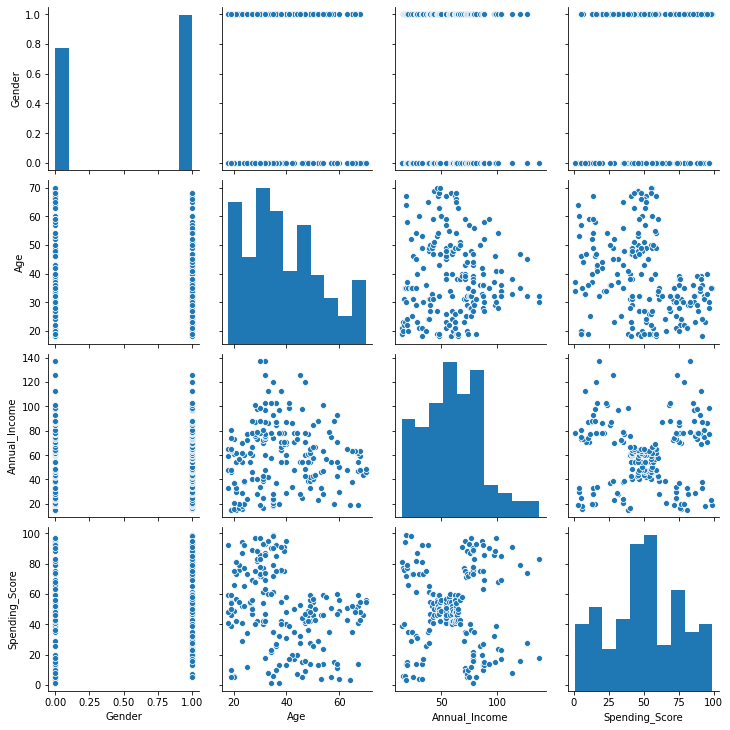

In [4]:
df = df.replace('Male', 0).replace('Female', 1)
sns.pairplot(df[['Gender', 'Age', 'Annual_Income', 'Spending_Score']])

<hr>


## <a name="M4">4. Selección del Número óptimo de Clusters
    
    
* Vamos a ver cual sería el número óptimo de Clusters con el método del codo; es decir, representando la inercia por el número de Clusters seleccionados y viendo donde se produce un cambio busco de tendencia.


* Con los resultados obtenidos cuesta ver donde hay un cambio busco de tendencia si son para 4, 5 o 6 Clusters.

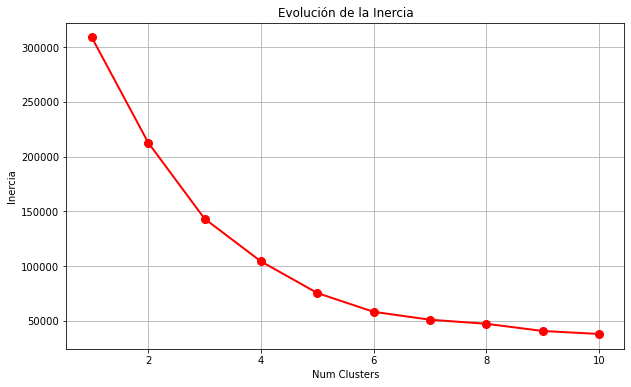

In [5]:
num_modelos = 10

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):
       
    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)
    
    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])
    

x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste
    
    
* Para crear el modelo vamos a seleccionar 5 Clusters.


In [6]:
# Creamos un objeto de la clase "KMeans()"
np.random.seed(7)
kmeans = KMeans(n_clusters=5, max_iter=50, init="random", random_state=9)

# Ajustamos el modelo
kmeans.fit(X)

KMeans(init='random', max_iter=50, n_clusters=5, random_state=9)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)


* Tras ajustar el modelo podemos obtener los centroides que representaran el valor medio de cada variable en cada Cluster.

In [7]:
# Valores de los centroides
centroides = kmeans.cluster_centers_
df_centroides = pd.DataFrame(centroides, 
                             columns=['Age', 'Annual_Income', 'Spending_Score'],
                             index=['Cluster {}'.format(index+1) for index, elem in enumerate(centroides)])
df_centroides

,Age,Annual_Income,Spending_Score
Cluster 1,25.521739,26.304348,78.565217
Cluster 2,32.692308,86.538462,82.128205
Cluster 3,45.217391,26.304348,20.913043
Cluster 4,40.666667,87.750000,17.583333
Cluster 5,43.088608,55.291139,49.569620


<hr>


## <a name="M6">6. Conclusiones: Interpretación de los resultados
    

* Con los resultados obtenidos podemos concluir:
<span></span><br><br>
    - ***Cluster 1***: Clientes más ***jóvenes*** (25 años de media) con ***ingresos bajos*** (26,3K) y un ***Scoring de compra Alto*** (78,5%).
<span></span><br><br>
    - ***Cluster 2***: Clientes de ***edad media*** (32,7 años) con ***altos ingresos*** (86,5K) y y un ***Scoring de compra Muy Alto*** (82%).
<span></span><br><br>
    - ***Cluster 3***: Clientes con la ***edad más alta*** (45,2 años) con ***ingresos bajos*** (26,3K) y y un ***Scoring de compra Bajo*** (20,9%).
<span></span><br><br>
    - ***Cluster 4***: Clientes de ***edad media-alta*** (40,7 años) con ***altos ingresos*** (87,7K) y y un ***Scoring de compra Muy Bajo*** (17,6%).
<span></span><br><br>
    - ***Cluster 5***: Clientes de ***edad alta*** (43,1 años) con ***ingresos medios*** (55,3K) y y un ***Scoring de compra Medio*** (49,6%).
<span></span><br><br>
    
* A modo de resumen podemos ver las distribuciones de cada uno de los Clusters por variable:

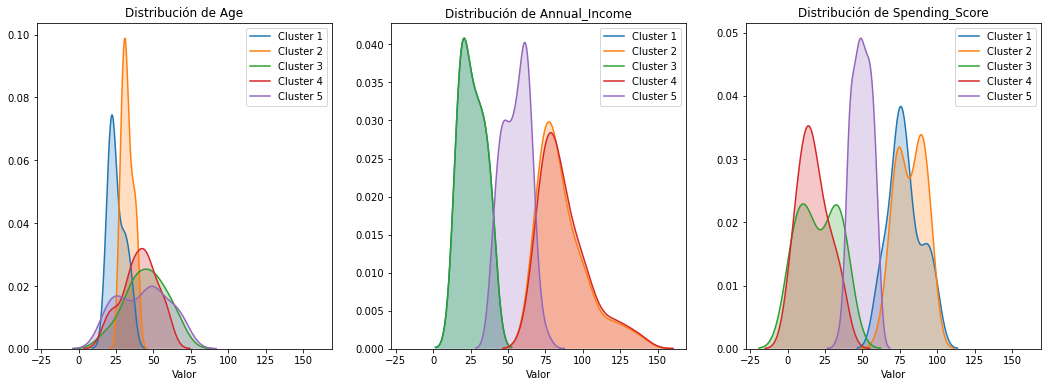

In [8]:
# Obtenemos las etiqueta del cluster a la que se asigna cada elemento
labels = kmeans.labels_


# Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = labels
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))


# Dibujamos las distribuciones de las 4 variables para cada uno de los Clusters
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
plt_position = [axes[0], axes[1], axes[2]]
for index, col in enumerate(df[['Age', 'Annual_Income', 'Spending_Score']]):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]] 
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel('Valor')

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">